In [15]:
pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 39.2 MB/s 
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103262 sha256=a2a41c9e10d21d8c8f7cad4d6b316eec528f640377850cd4798f208bef241b4c
  Stored in directory: /root/.cache/pip/wheels/24/20/6b/5550a3d6bef09ddaed74eb84006fc3d53f94867f1916794df4
Successfully built python-whois


In [1]:
import whois
import numpy as np
import pandas as pd

# mount drive and store file as string
from google.colab import drive
drive.mount('/content/drive')
# data_file = "/content/drive/MyDrive/CS 166/fake_news.csv"
# data_file = "/content/drive/MyDrive/CS 166/free_security.csv"
data_file = "/content/drive/MyDrive/CS 166/free_software.csv"
# data_file = "/content/drive/MyDrive/CS 166/lost_weight_quickly.csv"
# data_file = "/content/drive/MyDrive/CS 166/everyone_claim_bitcoin.csv"
# data_file = "/content/drive/MyDrive/CS 166/magic_pills.csv"

# read data file into pandas data frame
df = pd.read_csv(data_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# print dataframe for reference
df.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/4/screen_name,user_mentions/5/id_str,user_mentions/5/name,user_mentions/5/screen_name,user_mentions/6/id_str,user_mentions/6/name,user_mentions/6/screen_name,user_mentions/7/id_str,user_mentions/7/name,user_mentions/7/screen_name
0,1596556566529916928,2022-11-26T17:28:42.000Z,83384,Can someone tell me what the fired Twitter emp...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1596639965542338562,2022-11-26T23:00:06.000Z,7,In a world where technology can mean the diffe...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1596646760675348483,2022-11-26T23:27:06.000Z,0,&gt;&gt; &gt; &gt;&gt;&gt; &gt;&gt;Many paren...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1596615447591673856,2022-11-26T23:37:21.000Z,0,@gordonjcp @cybergibbons And even more impress...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1596652050229579776,2022-11-26T23:48:07.000Z,0,TASCAM US122 Audio/MIDI Interface with Free So...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# grab user posted links from tweets
links = df['urls/0/url'].dropna()
links

1      https://t.co/xM8cLBWSzk
4      https://t.co/Nf6mkn2HYR
9      https://t.co/UL0CexRFUo
17     https://t.co/lxbd9V0Z0z
27     https://t.co/ghlfB6fezr
                ...           
185    https://t.co/pWFrC8Ckpp
187    https://t.co/ErcLxTukB5
189    https://t.co/6cty409TC2
190    https://t.co/TduB7gpHR5
196    https://t.co/xRtjaOuACw
Name: urls/0/url, Length: 72, dtype: object

In [37]:
link_id = []    # holds country of origin
date_cr = []    # holds link creation date
for x in links:
  w = whois.whois(str(x))        # whois.whois(str(x)) --> started getting error 
  d = "Date"            # "Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer"
                        # so cannot connect to service anymore
  link_id.append(w["country"])     # w["country"] 
  date_cr.append(w["creation_date"])     # w["creation_date"]

Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to connect to socket: closing socket - [Errno 104] Connection reset by peer
Error trying to conne

In [38]:
df2 = pd.DataFrame({'URL':links, 'Country':link_id, 'Created':date_cr})
df2

,URL,Country,Created
1,https://t.co/xM8cLBWSzk,US,2010-04-26 07:50:40
4,https://t.co/Nf6mkn2HYR,US,2010-04-26 07:50:40
9,https://t.co/UL0CexRFUo,US,2010-04-26 07:50:40
17,https://t.co/lxbd9V0Z0z,US,2010-04-26 07:50:40
27,https://t.co/ghlfB6fezr,US,2010-04-26 07:50:40
...,...,...,...
185,https://t.co/pWFrC8Ckpp,None,NaT
187,https://t.co/ErcLxTukB5,None,NaT
189,https://t.co/6cty409TC2,None,NaT
190,https://t.co/TduB7gpHR5,None,NaT


# URL Distribution Graph

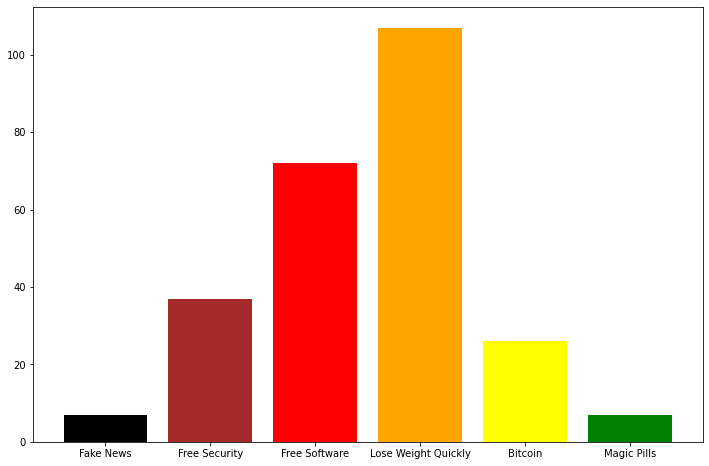

In [32]:
import matplotlib.pyplot as plt

fane = "/content/drive/MyDrive/CS 166/fake_news.csv"
frse = "/content/drive/MyDrive/CS 166/free_security.csv"
frso = "/content/drive/MyDrive/CS 166/free_software.csv"
lowq = "/content/drive/MyDrive/CS 166/lose_weight_quickly.csv"
evcb = "/content/drive/MyDrive/CS 166/everyone_claim_bitcoin.csv"
mapi = "/content/drive/MyDrive/CS 166/magic_pills.csv"

# fake news
fakenews = pd.read_csv(fane)
# free security
freesec = pd.read_csv(frse)
# free software
freesoft = pd.read_csv(frso)
# lose weight quickly
lostwtqu = pd.read_csv(lowq)
# everyone claim bitcoin
everyclbit = pd.read_csv(evcb)
# magic pills
magpill = pd.read_csv(mapi)

# bar plot data
labels = ('Fake News', 'Free Security', 'Free Software', 'Lose Weight Quickly', 'Bitcoin', 'Magic Pills')
height = [len(fakenews['urls/0/url'].dropna()), 
          len(freesec['urls/0/url'].dropna()),
          len(freesoft['urls/0/url'].dropna()),
          len(lostwtqu['urls/0/url'].dropna()),
          len(everyclbit['urls/0/url'].dropna()),
          len(magpill['urls/0/url'].dropna())]

x_pos = np.arange(len(labels))
# Create bars with different colors
plt.figure(figsize=(12,8))
plt.bar(x_pos, height, color=['black', 'brown', 'red', 'orange', 'yellow', 'green'])
# Create names on the x-axis
plt.xticks(x_pos, labels)
# Show graph
plt.show()